<a href="https://colab.research.google.com/github/ragedharb16/sales-predictions/blob/main/projects_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT 2

1) Source of data


https://www.kaggle.com/nurulsyazanaramlee/diabetes-prediction

2) Brief description of data

The data is related with health problems like diabetis 


3) What is the target?
 if the person has or nort diabetis


 4) Is this a classification or regression problem?

 classification problem


 5) How many features?


 7 features 1 target

6) How many rows of data.

  768


 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

 i think has to be some visualisations problems also cleaning exploring and 
 use the best  model to clasificated our model





#DATA
NoofPregnancies:information about the number of pregnancy female had till date


GlucoseLevel: glucose level of patient generally higher glucose level shoes the chances of sugar


DiastolicPressure: diastolic pressure is specifically the minimum arterial pressure during relaxation and dilatation of the ventricles of the heart 



Insuline level: Insulin level of patient


BMI:The full form of BMI is Body Mass Index. It is a method of measuring through which individuals are classified into the following categories


RelativeHistory: history of the patient


Age: AGe of the patient


Diabetic: 0 shows that patient doesn't have diabetes 1 shows patient have diabetes











In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.impute import SimpleImputer
 

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn import set_config
set_config(display='diagram')

In [3]:
df=pd.read_csv("/content/diabetesprediction.csv")
df

,NoofPregnancies,GlucoseLevel,DiastolicPressure,Insulin Level,BMI,RelativeHistory,Age,Diabetic
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


-deleted unnecessary columns

NO UNNECESSATY COLUMNS FOUND

In [4]:
df.dtypes
# checking that all the data match 

NoofPregnancies        int64
GlucoseLevel           int64
DiastolicPressure      int64
Insulin Level          int64
BMI                  float64
RelativeHistory      float64
Age                    int64
Diabetic               int64
dtype: object

-deleted duplicate rows

In [5]:
df.duplicated().sum()
# no duplicates

0

In [6]:
df.isna().sum()
# no missing data

NoofPregnancies      0
GlucoseLevel         0
DiastolicPressure    0
Insulin Level        0
BMI                  0
RelativeHistory      0
Age                  0
Diabetic             0
dtype: int64

avoiding data leakage

In [7]:
df_ml= df.copy()

since we dont have any object data we dont have to find any erros

In [8]:
df.describe()

,NoofPregnancies,GlucoseLevel,DiastolicPressure,Insulin Level,BMI,RelativeHistory,Age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df["DiastolicPressure"].sort_values()

#  we can se here that we have some values of 0, wich is impossible we are using the median to fill that 0 

347      0
494      0
222      0
81       0
78       0
      ... 
549    110
43     110
177    110
691    114
106    122
Name: DiastolicPressure, Length: 768, dtype: int64

In [10]:
df['GlucoseLevel'].sort_values()
# we can see that we have some values in the glucoselevel in 0 wich is imposible every body need glucose
# to survive

75       0
502      0
349      0
342      0
182      0
      ... 
228    197
408    197
8      197
561    198
661    199
Name: GlucoseLevel, Length: 768, dtype: int64

In [11]:
df["Insulin Level"].sort_values()
# also we can see here insulin level in 0 is imposible wich is a bad data we going to fix with median

0        0
443      0
440      0
439      0
438      0
      ... 
409    579
584    600
247    680
228    744
13     846
Name: Insulin Level, Length: 768, dtype: int64

In [12]:
df["Insulin Level"]= df["Insulin Level"].replace(0,df["Insulin Level"].median())
df["GlucoseLevel"]= df["GlucoseLevel"].replace(0,df["GlucoseLevel"].median())
df["DiastolicPressure"]= df["DiastolicPressure"].replace(0,df["DiastolicPressure"].median())

In [13]:
df.describe()

,NoofPregnancies,GlucoseLevel,DiastolicPressure,Insulin Level,BMI,RelativeHistory,Age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#visualitation

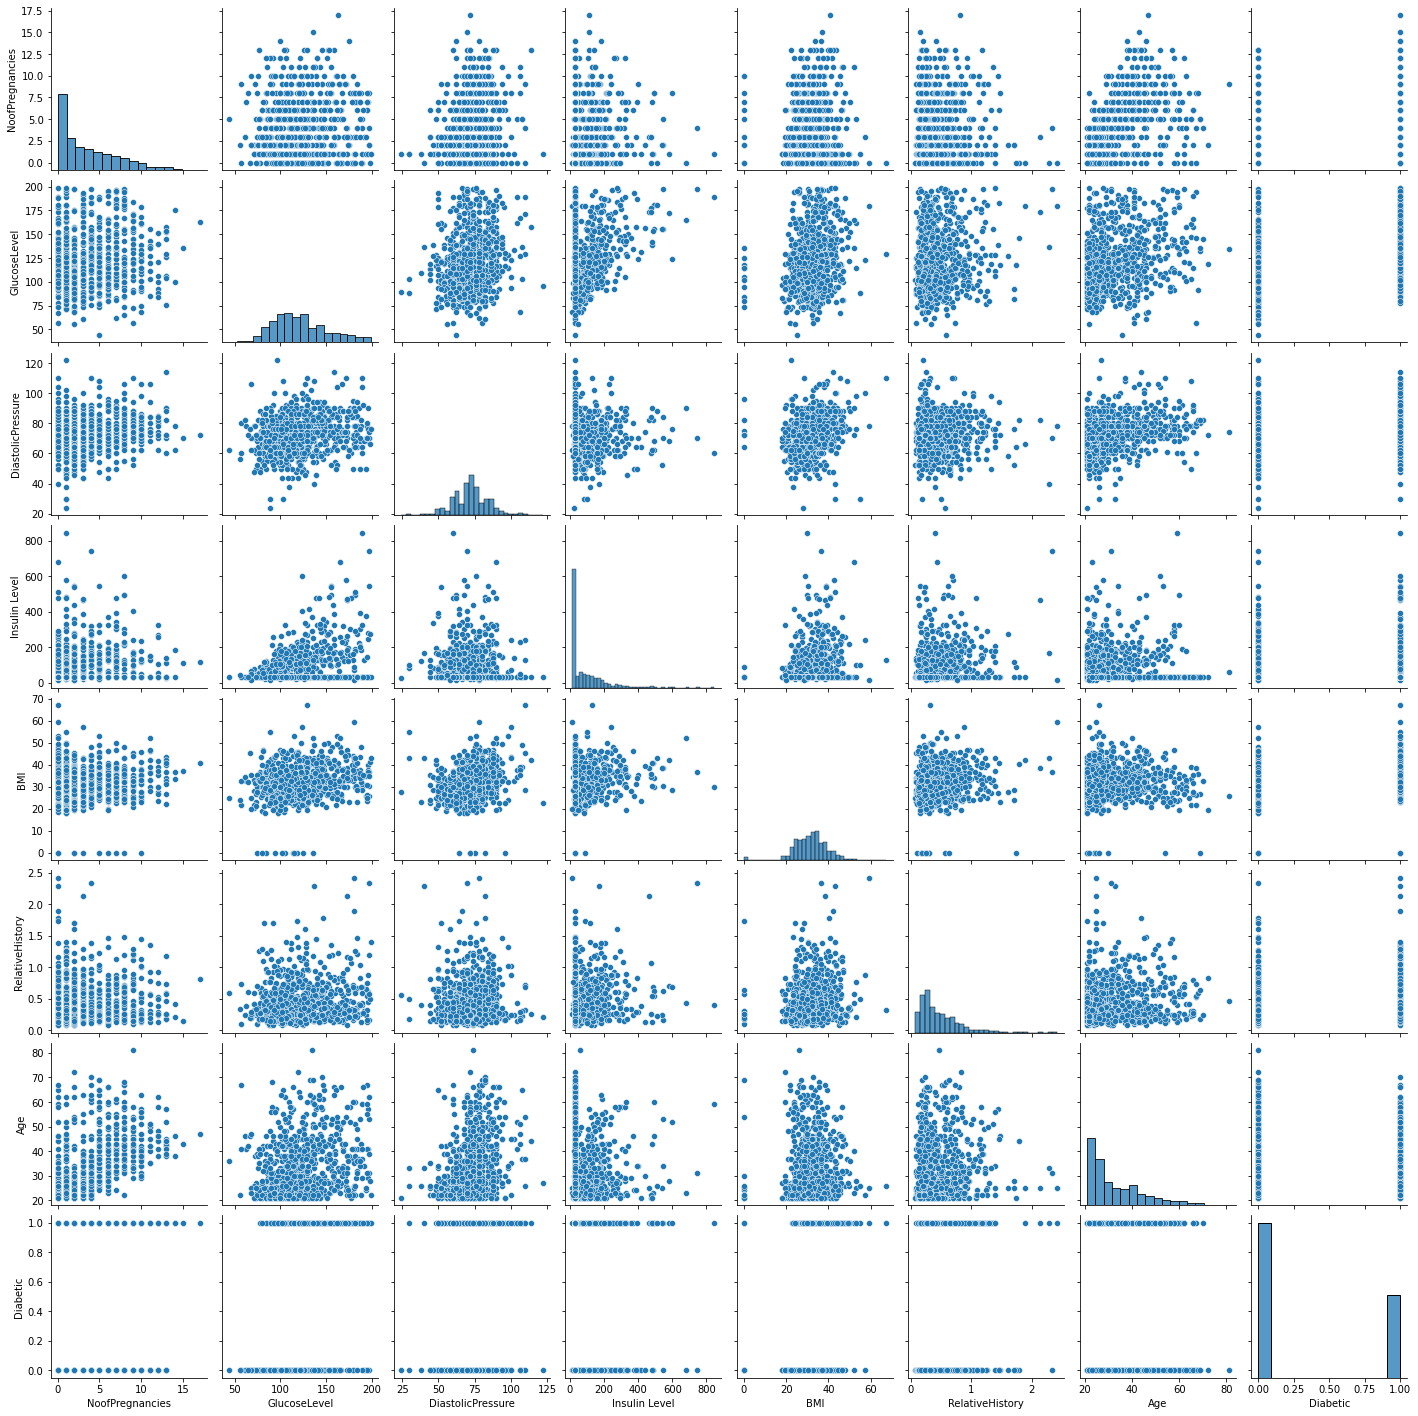

In [14]:
sns.pairplot(df)

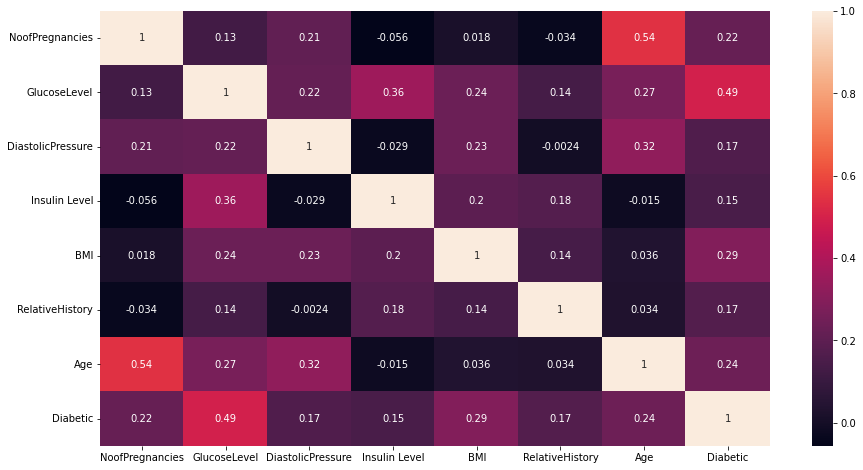

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

we can see here the relation betwen the GlucoseLevel and the DIabetic

[Text(0.5, 1.0, 'Relatition Gloucose and Insuline')]

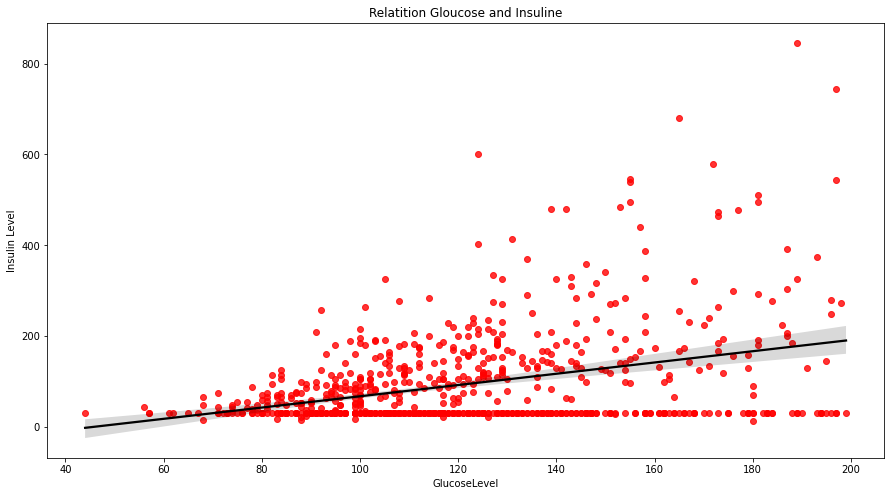

In [16]:
plt.figure(figsize=(15,8))
sns.regplot(x=df["GlucoseLevel"],y=df["Insulin Level"],scatter_kws={"color": "Red"}, color="Black")\
.set(Title='Relatition Gloucose and Insuline')

RElatation betwen the glucose and the insulin wich is the hormon that stabilize the glucose in our blood 

[Text(0.5, 1.0, 'AGE And Diastolic pressure')]

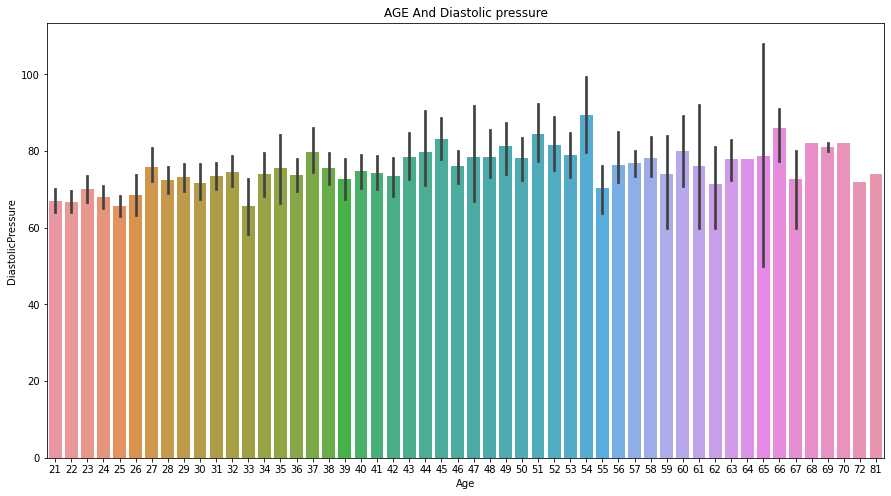

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x=df["Age"],y=df["DiastolicPressure"]).set(title="AGE And Diastolic pressure")

We can see here how the Diastolic pressure is increassing by the age 

In [18]:
# df.loc[df.Age <=40,"Age Group"]= "Young"
# df.loc[df.Age >=41,"Age Group"]= "Old"

In [19]:
# plt.figure(figsize=(10,6))
# sns.barplot(x=df['Age Group'], y=df["Diabetic"])


after watch the "age insuline graph, we can see that Age is has a correlattion with diabetic desease

[Text(0.5, 1.0, 'Age and glucolse Level')]

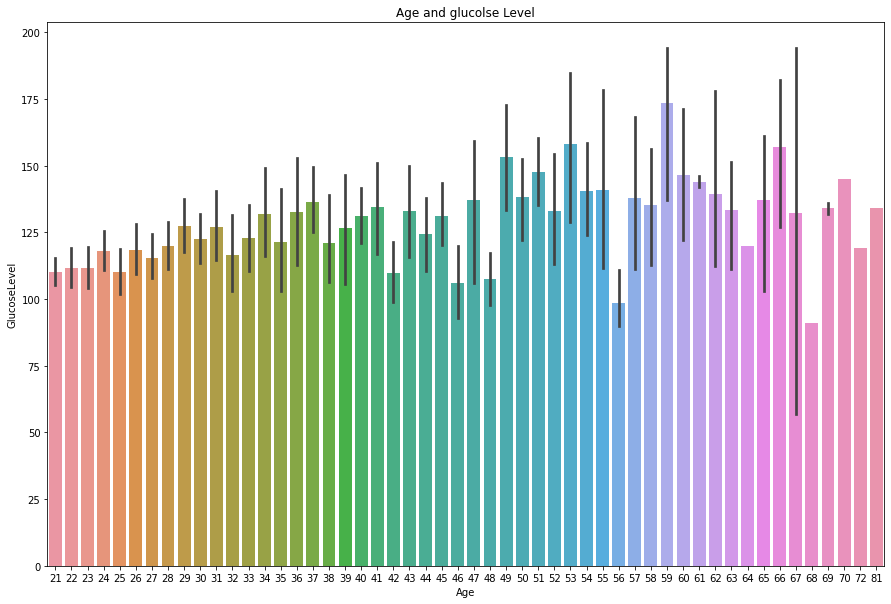

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x=df["Age"],y=df["GlucoseLevel"]).set(title="Age and glucolse Level")


THe glucose is increase with the pass of the years 

##Machine learning

KNN CLASIFICATOR

In [21]:
X=df_ml.drop(columns='Diabetic')
y=df_ml["Diabetic"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [25]:
mediamimput=SimpleImputer(strategy='median')

In [23]:
# Create a pipeline to scale the data and instantiate the PCA.
transformer = make_pipeline(StandardScaler(), PCA(n_components=.80))

In [27]:
num_tuple= (mediamimput, transformer)

In [28]:

knn=KNeighborsClassifier()

In [29]:
knnpipe= make_pipeline(transformer, knn)

In [30]:
knnpipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.8))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [31]:
knntrainscore =knnpipe.score(X_train, y_train)
knntestscore= knnpipe.score(X_test,y_test)
knntrainscore
knn


KNeighborsClassifier()

In [32]:
knnpcaclasification = classification_report(y_test, knnpipe.predict(X_test))
print(f'clasification KNN with PCA {knnpcaclasification}')

clasification KNN with PCA               precision    recall  f1-score   support

           0       0.79      0.80      0.79       123
           1       0.63      0.62      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [34]:
knnpipe2= make_pipeline(StandardScaler(),knn)
knnpipe2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [35]:
knnscoret= knnpipe2.score(X_train,y_train)
Knnscoretest= knnpipe2.score(X_test,y_test)
knnscoret
Knnscoretest

0.7135416666666666

In [36]:
krange = range(1, 10)
k_list = []
for k in krange: 
  knn_model_processor = make_pipeline(transformer, KNeighborsClassifier(n_neighbors=k))
  knn_model_processor.fit(X_train, y_train)
  score = accuracy_score(y_test, knn_model_processor.predict(X_test))
  k_list.append(score)

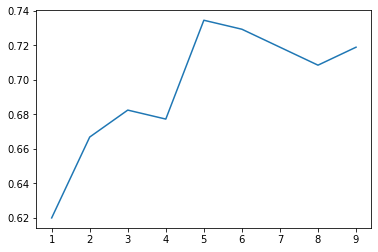

In [37]:
plt.plot(krange, k_list)

In [38]:

knn=KNeighborsClassifier(n_neighbors=5)
knnfinalpca= make_pipeline(StandardScaler(),knn)
knnfinalpca.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [39]:
knnfinaltrain= knnfinalpca.score(X_train, y_train)
knnfinaltest= knnfinalpca.score(X_test, y_test)
knnfinaltrain


0.8350694444444444

In [40]:
xgb = XGBClassifier()
xgbpipe=make_pipeline(transformer,xgb)
xgbpipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.8))])),
                ('xgbclassifier', XGBClassifier())])

In [41]:
trainxgb =xgbpipe.score(X_train, y_train)
testxgb= xgbpipe.score(X_test, y_test)
trainxgb
testxgb

0.71875

In [42]:
rf= RandomForestClassifier()
rfpipe= make_pipeline(transformer, rf)
rfpipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.8))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [43]:
rftrain= rfpipe.score(X_train, y_train)
rftest= rfpipe.score(X_test, y_test)


In [44]:
krange = range(2,100)
k_list = []
for k in krange: 
  rfsuperpipe = make_pipeline(transformer, RandomForestClassifier(max_depth=k))
  rfsuperpipe.fit(X_train, y_train)
  score = accuracy_score(y_test, rfsuperpipe.predict(X_test))
  k_list.append(score)

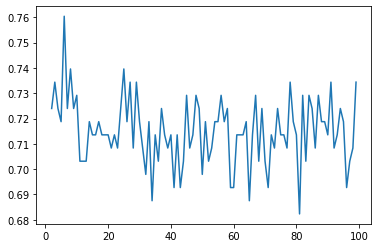

In [45]:
plt.plot(krange, k_list)

In [46]:
rf= RandomForestClassifier(max_depth=10)
rfpipe= make_pipeline(transformer, rf)
rfpipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.8))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10))])

In [47]:
rftrain= rfpipe.score(X_train, y_train)
rftest= rfpipe.score(X_test, y_test)
rftrain

0.9947916666666666

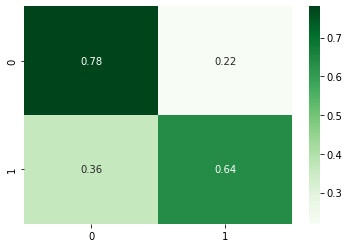

In [48]:
rfmatrix= confusion_matrix(y_test, rfpipe.predict(X_test),normalize='true')
sns.heatmap(rfmatrix,annot=True,cmap='Greens')

In [49]:
print(f'Training AUC: {roc_auc_score(y_train, rfpipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, rfpipe.predict_proba(X_test)[:,1])}')

Training AUC: 1.0
Testing AUC: 0.7776599505125487


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


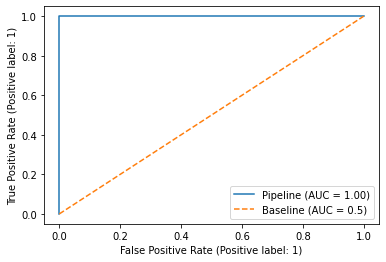

In [50]:
plot_roc_curve(rfpipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [51]:
RFclasification = classification_report(y_test, rfpipe.predict(X_test))
print(f'clasification Random forrest with PCA {RFclasification}')

clasification Random forrest with PCA               precision    recall  f1-score   support

           0       0.79      0.78      0.79       123
           1       0.62      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



##KNN CLASSIFICATION

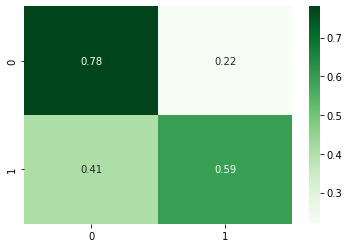

In [52]:
knnmatrix= confusion_matrix(y_test, knnfinalpca.predict(X_test),normalize='true')
sns.heatmap(knnmatrix,annot=True,cmap='Greens')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


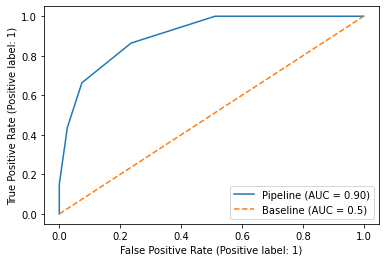

In [53]:
plot_roc_curve(knnfinalpca, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [54]:
knnpcaclasification = classification_report(y_test, knnpipe2.predict(X_test))
print(f'clasification KNN with PCA\n {knnpcaclasification}')

clasification KNN with PCA
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       123
           1       0.60      0.59      0.60        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.71      0.71       192



##XGB RESULTS

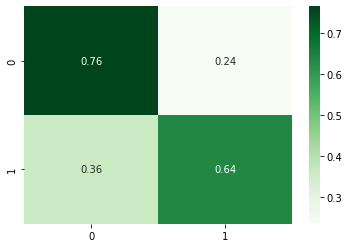

In [55]:
xgbmatrix= confusion_matrix(y_test, xgbpipe.predict(X_test),normalize='true')
sns.heatmap(xgbmatrix,annot=True,cmap='Greens')

In [56]:
Xgbcclasification = classification_report(y_test, xgbpipe.predict(X_test))
print(f'clasification XGB with PCA {Xgbcclasification}')

clasification XGB with PCA               precision    recall  f1-score   support

           0       0.79      0.76      0.78       123
           1       0.60      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


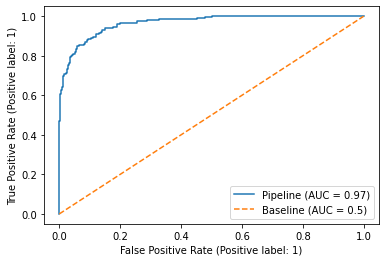

In [57]:
plot_roc_curve(xgbpipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();